In [1]:
import iris
import os
import iris.quickplot as qplt
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
import iris.plot as iplt

In [54]:
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/mon/"

In [55]:
varlist = os.listdir(path)

In [56]:
new ={}
for var in varlist:
    var2 = ''.join([i for i in var if not i.isdigit()])
    if var2 in new.keys():
        new[var2].append(var)
    else: 
        new[var2] = [var]

        
        

In [57]:
data = iris.cube.CubeList()
for key in ['evspsbl','hurs','mrro','mrfso','prc','rlus','sund','uam','vam']:
    print(key)
    tmp = iris.load([path+var+"/*" for var in new[key]])
    if len(new[key])>1:
        for cube in tmp:
            cube.var_name=None
            cube.long_name=None
    iris.util.equalise_attributes(tmp)
    data.append(tmp.merge().concatenate_cube())

evspsbl
hurs
mrro
mrfso
prc
rlus
sund
uam


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ua100m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ua100m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ua100m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.

vam


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'va100m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'va100m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'va100m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.

In [58]:
data

[<iris 'Cube' of water_evapotranspiration_flux / (kg m-2 s-1) (time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of relative_humidity / (%) (time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of runoff_flux / (kg m-2 s-1) (time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of soil_frozen_water_content / (kg m-2) (time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of convective_precipitation_flux / (kg m-2 s-1) (time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_upwelling_longwave_flux_in_air / (W m-2) (time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of duration_of_sunshine / (s) (time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of eastward_wind / (m s-1) (height: 5; time: 36; latitude: 436; longitude: 777)>,
<iris 'Cube' of northward_wind / (m s-1) (height: 5; time: 36; latitude: 436; longitude: 777)>]

water_evapotranspiration_flux
relative_humidity
runoff_flux


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


soil_frozen_water_content


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


convective_precipitation_flux
surface_upwelling_longwave_flux_in_air
duration_of_sunshine
eastward_wind
northward_wind


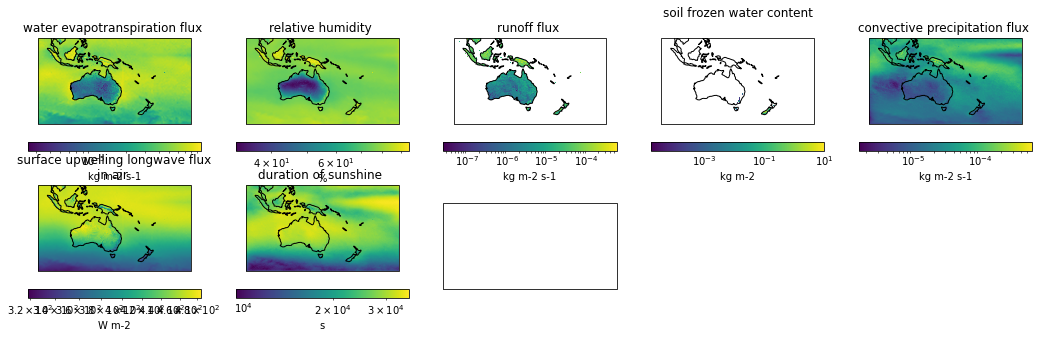

In [59]:
plt.figure(figsize=(18,32))
i=0
for cube in data:
    print(cube.name())
    name = cube.name().split("_")
    name = "".join([x+" " if i != 3 else x+"\n" for i,x in enumerate(name) ])
    if not cube.coord('longitude').has_bounds():
        cube.coord('longitude').guess_bounds()
        cube.coord('latitude').guess_bounds()
    ax=plt.subplot(12,5,i+1,projection=ccrs.PlateCarree(180))
    if cube.ndim==3:
        if cube.name() in ["sea_ice_area_fraction","surface_upwelling_longwave_flux_in_air_assuming_clear_sky","atmosphere_convective_inhibition_wrt_surface",'eastward_wind','northward_wind', 'surface_downward_eastward_stress','surface_downward_northward_stress','downward_air_velocity']:
            qplt.pcolormesh(cube.collapsed('time',iris.analysis.MEAN))
        else:
            qplt.pcolormesh(cube.collapsed('time',iris.analysis.MEAN),norm=LogNorm())
        ax.coastlines()
        plt.title(name)
        i+=1
    if i >=60:
        break

In [15]:
data

[<iris 'Cube' of frozen_water_content_of_soil_layer / (kg m-2) (time: 24; depth: 4; latitude: 436; longitude: 777)>,
<iris 'Cube' of upward_air_velocity / (m s-1) (pressure: 17; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of air_temperature / (K) (pressure: 17; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of eastward_wind / (m s-1) (pressure: 17; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of specific_humidity / (1) (pressure: 17; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of northward_wind / (m s-1) (pressure: 17; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of atmosphere_boundary_layer_thickness / (m) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of water_evapotranspiration_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of eastward_wind / (m s-1) (height: 6; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of cloud_area_fraction_in_atmosphere_layer / (%) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of northward_wind / (m s-1) (height: 6; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of geopotential_height / (m) (pressure: 17; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of runoff_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of cloud_area_fraction_in_atmosphere_layer / (%) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of atmosphere_mass_content_of_cloud_ice / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of atmosphere_mass_content_of_water_vapor / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of specific_humidity / (1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of toa_incoming_shortwave_flux / (W m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of convective_precipitation_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of sea_ice_area_fraction / (%) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of atmosphere_convective_available_potential_energy_wrt_surface / (J kg-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_downwelling_longwave_flux_in_air_assuming_clear_sky / (W m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of air_temperature / (K) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of air_pressure_at_mean_sea_level / (Pa) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_snow_thickness / (m) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of Moisture in Upper Portion of Soil Column / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of atmosphere_convective_inhibition_wrt_surface / (J kg-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of Total Soil Moisture Content / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_upwelling_shortwave_flux_in_air_assuming_clear_sky / (W m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_downwelling_shortwave_flux_in_air_assuming_clear_sky / (W m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of wind_speed / (m s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_air_pressure / (Pa) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_snow_melt_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of duration_of_sunshine / (s) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of precipitation_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of toa_outgoing_longwave_flux / (W m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_snow_amount / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of relative_humidity / (%) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of frozen_water_content_of_soil_layer / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_downwelling_longwave_flux_in_a

In [60]:
len([cube for cube in data if cube.ndim==3])

7

In [53]:
data

[<iris 'Cube' of water_evapotranspiration_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of relative_humidity / (%) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of runoff_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of soil_frozen_water_content / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of convective_precipitation_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_upwelling_longwave_flux_in_air / (W m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of duration_of_sunshine / (s) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of eastward_wind / (m s-1) (height: 6; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of northward_wind / (m s-1) (height: 6; time: 24; latitude: 436; longitude: 777)>]

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/numpy/ma/core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


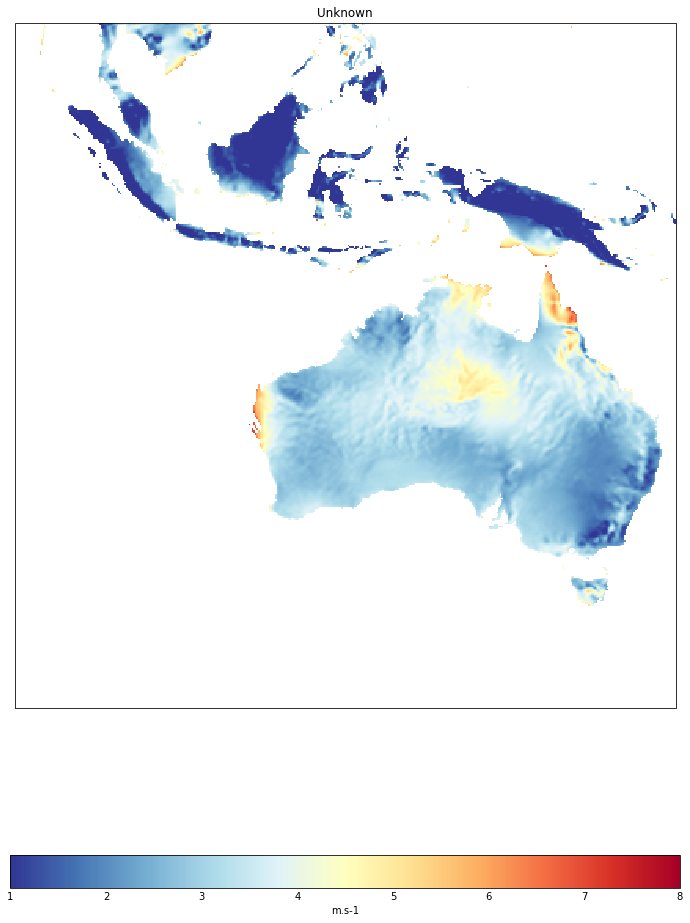

In [61]:

plt.figure(figsize=(12,18))
cx=iris.Constraint(longitude=lambda x: 90<=x<=155)
ws = (data[7]**2+data[8]**2)**0.5
ws.data.mask += data[2].data.mask
qplt.pcolormesh(ws[1].extract(cx).collapsed('time',iris.analysis.MEAN),vmin=1,vmax=8,cmap='RdYlBu_r')

In [62]:
ws.coord('height')

<DimCoord: height / (m)  [ 50., 100., 150., 200., 250.]  shape(5,)>

In [113]:
orog=iris.load('orog.nc')
mask = iris.load("/g/data/tp28/dev/barpa/ancils/barpa-r/land_sea_mask/cci/qrparm.mask.nc")

In [103]:
orog[0].coord('longitude')[:-20][-1],ws.coord('longitude')[-11]

(<DimCoord: longitude / (degrees)  [206.382]>,
 <DimCoord: longitude / (degrees)  [206.383]+bounds>)

In [114]:
print(mask)

orog=orog[0][11:-11,11:-10]

mask=mask[1][11:-11,11:-10]

0: land_area_fraction / (1)            (latitude: 458; longitude: 798)
1: land_binary_mask / (1)              (latitude: 458; longitude: 798)


In [115]:
iris.save(mask,"barpa-r_mask_clip.nc")
iris.save(mask,"barpa-r_orog_clip.nc")

In [66]:
a=orog.coord('longitude').points
b=ws.coord('longitude').points


In [67]:
orog = ws[0,0].copy(data=orog.data)


In [68]:
cy=iris.Constraint(latitude=lambda y: y<-10)

In [69]:
np.unravel_index(orog.extract(cx&cy).data.argmax(),orog.extract(cx&cy).shape)

(112, 378)

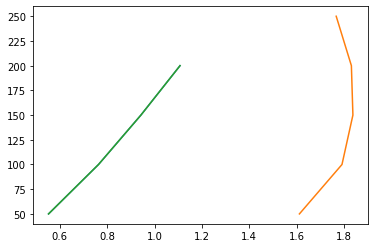

In [71]:
plt.plot(ws.extract(cx&cy)[:,0,112,378].data,ws.coord('height').points)
plt.plot(ws.extract(cx&cy)[:,0,112,388].data,ws.coord('height').points)
plt.plot(ws.extract(cx&cy)[:,0,112,378].data,ws.coord('height').points)

In [133]:
orog.extract(cx&cy)[112,378].data

array(0., dtype=float32)

In [141]:
orog.extract(cx&cy)[112,370:390].data

masked_array(data=[ 340.40625,  475.71875,  663.3594 ,  701.6094 ,
                    537.1406 ,  471.125  ,  814.1406 , 1354.1875 ,
                   1568.4062 , 1354.1406 , 1069.9219 ,  941.4219 ,
                    919.28125,  947.5    ,  961.5    ,  823.71875,
                    523.1406 ,  235.51562,   81.25   ,    0.     ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

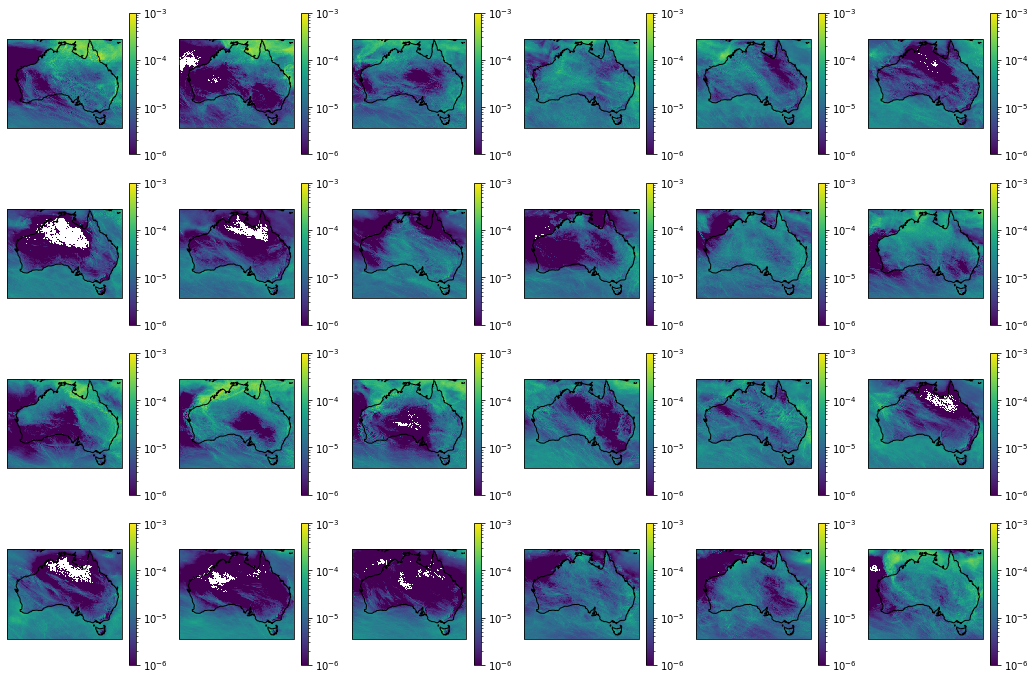

In [185]:
plt.figure(figsize=(18,12))

cx=iris.Constraint(longitude=lambda x: 110<=x<=155)
cy=iris.Constraint(latitude=lambda x: -45<=x<=-10)
if not data[4].coord('longitude').has_bounds():
        data[4].coord('longitude').guess_bounds()
        data[4].coord('latitude').guess_bounds()

for i in range(24):
    ax=plt.subplot(4,6,i+1,projection=ccrs.PlateCarree())
    iplt.pcolormesh(data[4][i].extract(cx&cy),norm=LogNorm(vmin=0.000001,vmax=0.001))
    ax.coastlines()
    plt.colorbar()

In [146]:
import iris.plot as iplt

In [152]:
data

[<iris 'Cube' of water_evapotranspiration_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of relative_humidity / (%) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of runoff_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of soil_frozen_water_content / (kg m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of convective_precipitation_flux / (kg m-2 s-1) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of surface_upwelling_longwave_flux_in_air / (W m-2) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of duration_of_sunshine / (s) (time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of eastward_wind / (m s-1) (height: 6; time: 24; latitude: 436; longitude: 777)>,
<iris 'Cube' of northward_wind / (m s-1) (height: 6; time: 24; latitude: 436; longitude: 777)>]

In [168]:
data[3].extract(cx&cy).data.max()

1.8822674

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


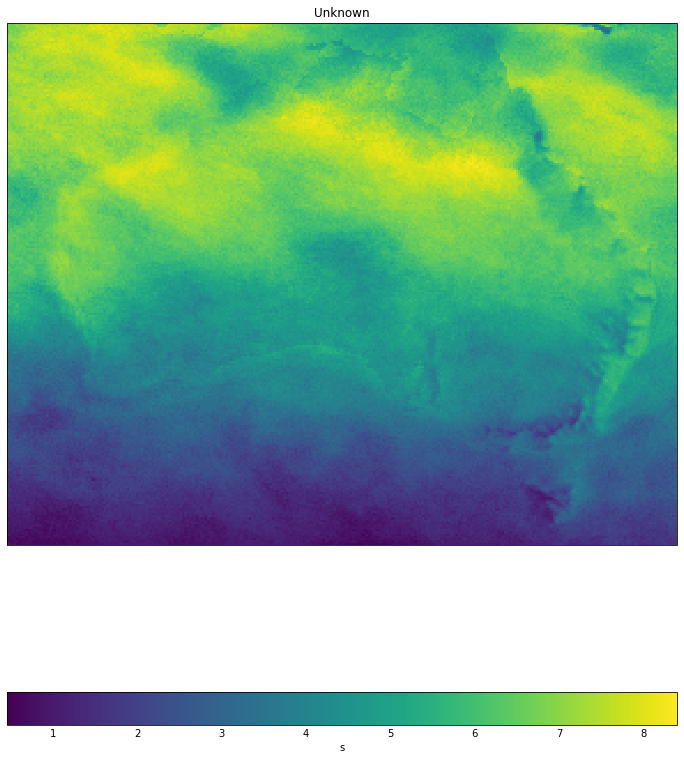

In [191]:

plt.figure(figsize=(12,18))
#cx=iris.Constraint(longitude=lambda x: 140<=x<=155)
#cy=iris.Constraint(latitude=lambda x: -45<=x<=-28)
qplt.pcolormesh(data[6].extract(cx&cy).collapsed('time',iris.analysis.MIN)/3600)

In [188]:
data[6].data.min()/3600

0.0

In [72]:


path1 ="/g/data/tp28/dev/barpa/prod/chs548/cg282_ERA5_historical_1979_sciB/19800101T0000Z/nc/MDL15M2/wnd_ucmp-ERA-ERA5-historical-r1-barpa_r-v1-198001010015-198001020000.nc"
pathT ="/g/data/tp28/dev/barpa/prod/chs548/cg282_ERA5_historical_1979_sciB/19800101T0000Z/nc/MDL15M1/*-ERA-ERA5-historical-r1-barpa_r-v1-198001010015-198001020000.nc"

path2 = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/15min/ua*m/ua*m_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_15min_198001-198012.nc"


ct = iris.Constraint(time=lambda t: t.point.day==1 and t.point.month==1)

In [74]:
data1 = iris.load_cube(path1)
dataT = iris.load_cube(pathT)

orog = iris.load_cube('orog.nc')
orog.coord('longitude').coord_system = data1.coord('longitude').coord_system
orog.coord('latitude').coord_system = data1.coord('latitude').coord_system

In [75]:
alt_s = iris.coords.AuxCoord(orog.regrid(dataT,iris.analysis.Linear()).data,'surface_altitude',units='m')
dataT.add_aux_coord(alt_s,[2,3])
alt = iris.aux_factory.HybridHeightFactory(dataT.coord('level_height'),dataT.coord('sigma'),alt_s).make_coord(dataT.coord_dims)
alt_gl = alt.copy()
alt_gl.points = alt.points - alt_s.points

In [91]:
alt_s = iris.coords.AuxCoord(orog.regrid(data1,iris.analysis.Linear()).data,'surface_altitude',units='m')
data1.add_aux_coord(alt_s,[2,3])
alt = iris.aux_factory.HybridHeightFactory(data1.coord('level_height'),data1.coord('sigma'),alt_s).make_coord(data1.coord_dims)
alt_gl = alt.copy()
alt_gl.points = alt.points - alt_s.points

ValueError: Duplicate coordinates are not permitted.

In [97]:
alt_sr = iris.coords.AuxCoord(orog.regrid(data3,iris.analysis.Linear()).data,'surface_altitude',units='m')
data3.add_aux_coord(alt_sr,[2,3])
altr = iris.aux_factory.HybridHeightFactory(data3.coord('level_height'),data3.coord('sigma'),alt_sr).make_coord(data3.coord_dims)
alt_glr = altr.copy()
alt_glr.points = altr.points - alt_sr.points

In [98]:
#dataT.add_aux_coord(alt_gl,[1,2,3])

#data1.add_aux_coord(alt_gl,[1,2,3])
data3.add_aux_coord(alt_glr,[1,2,3])

In [79]:
data2 = iris.load(path2,ct)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ua100m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ua150m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:223: UnknownCellMethodWarning: NetCDF variable 'ua200m' contains unknown cell method 'interpolation'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.

In [80]:
for cube in data2:
    cube.var_name=None
    cube.long_name=None

iris.util.equalise_attributes(data2)
data2 =data2.merge_cube()

In [81]:
cx = iris.Constraint(longitude = lambda x: 120<=x<=125)
cy = iris.Constraint(latitude = lambda x: -25<=x<=-20)


data3 = data1.extract(cx&cy).regrid(data2.extract(cx&cy),iris.analysis.Linear())

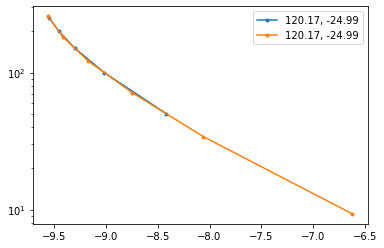

In [101]:
plt.plot(data2.extract(cx&cy)[:,1,0,1].data,(data2.coord("height").points),'.-',label = "%0.2f, %0.2f"%(data2.extract(cx&cy).coord('longitude').points[1],data2.extract(cx&cy).coord('latitude').points[0]))
plt.plot(data3.extract(cx&cy)[0,:6,0,1].data,(data3.extract(cx&cy).coord("altitude")[:6,0,1].points),'.-',label = "%0.2f, %0.2f"%(data2.extract(cx&cy).coord('longitude').points[1],data2.extract(cx&cy).coord('latitude').points[0]))

#iplt.plot(data1.extract(cx&cy)[0,:6,0,0],data1.extract(cx&cy)[0,:6,0,0].coord('altitude'),'.-',label = "orig %0.2f, %0.2f"%(data1.extract(cx&cy).coord('longitude').points[0],data1.extract(cx&cy).coord('latitude').points[0]))
#iplt.plot(data1.extract(cx&cy)[0,:6,0,1],data1.extract(cx&cy)[0,:6,0,1].coord('altitude'),'.-',label = "orig %0.2f, %0.2f"%(data1.extract(cx&cy).coord('longitude').points[1],data1.extract(cx&cy).coord('latitude').points[0]))
plt.semilogy()
plt.legend()

In [13]:
import iris.plot as iplt

In [84]:
data1

X Wind (m s-1),time,model_level_number,latitude,longitude
Shape,96,10,458,798
Dimension coordinates,,,,
time,x,-,-,-
model_level_number,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
forecast_period,x,-,-,-
level_height,-,x,-,-
sigma,-,x,-,-


In [90]:
alt

<AuxCoord: altitude / (m)  [...]  shape(10, 458, 798)>

In [10]:
data1

X Wind (m s-1),time,model_level_number,latitude,longitude
Shape,96,10,458,798
Dimension coordinates,,,,
time,x,-,-,-
model_level_number,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
forecast_period,x,-,-,-
level_height,-,x,-,-
sigma,-,x,-,-


In [22]:
"%0.2f, %0.2f"%(data2.extract(cx&cy).coord('longitude').points[0],data2.extract(cx&cy).coord('latitude').points[0])

'130.06, -24.99'

In [89]:
data1.extract(cx&cy)[:,:,0,0]

<iris 'Cube' of x_wind / (m s-1) (time: 96; model_level_number: 10)>

In [32]:
print(data2[0,1].coord('time'),data1[0,0].coord('time'))

DimCoord :  time / (days since 1949-12-01, proleptic_gregorian calendar)
    points: [1980-01-01 00:15:00]
    shape: (1,)
    dtype: float64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time' DimCoord :  time / (days since 1949-12-01, proleptic_gregorian calendar)
    points: [1980-01-01 00:15:00]
    shape: (1,)
    dtype: float64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'


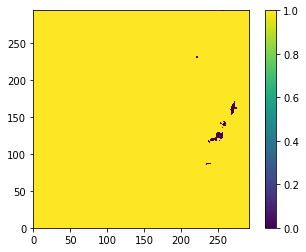

In [61]:
plt.subplot(111,aspect=1)
plt.pcolormesh(data1.extract(iris.Constraint(latitude=lambda x:x<-10)&iris.Constraint(longitude=lambda x:110<x<155)).coord('altitude')[5].points>250)
plt.colorbar()

In [51]:
data1.coord('level_height').points

masked_array(data=[  10.00000176,   36.66400679,   76.66401258,
                    130.00002775,  196.66403693,  276.66406001,
                   1210.0001895 , 1396.66424765, 1596.66431559,
                   1810.00027024],
             mask=False,
       fill_value=1e+20)

In [58]:
data1.extract(iris.Constraint(latitude=lambda x:x<-10)&iris.Constraint(longitude=lambda x:110<x<155)).coord('altitude')[5].points.min()

230.97629424218758

In [59]:
data1.coord('altitude')[5].points.min()

165.68050919805864

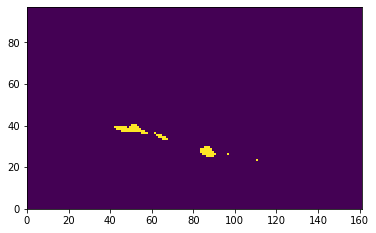

In [71]:
plt.subplot(111,aspect=1)
plt.pcolormesh(data1.extract(iris.Constraint(latitude=lambda x:-10<x<5)&iris.Constraint(longitude=lambda x:130<x<155)).coord('altitude')[5].points<200)

In [73]:
(data1.coord('altitude')[5].points).min()

165.68050919805864

In [6]:
data1.coord('level_height').points

masked_array(data=[  10.00000176,   36.66400679,   76.66401258,
                    130.00002775,  196.66403693,  276.66406001,
                   1210.0001895 , 1396.66424765, 1596.66431559,
                   1810.00027024],
             mask=False,
       fill_value=1e+20)

In [47]:
np.log

<ufunc 'log'>

CoordinateNotFoundError: "Expected to find exactly 1 'altitude' coordinate, but found none."

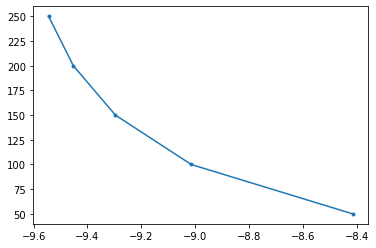

In [88]:
iplt.plot(data2.extract(cx&cy)[:,1,0,1],data2.coord("height"),'.-',label = "%0.2f, %0.2f"%(data2.extract(cx&cy).coord('longitude').points[1],data2.extract(cx&cy).coord('latitude').points[0]))
iplt.plot(data1.extract(cx&cy)[0,:6,0,1],data1.extract(cx&cy).coord("altitude")[:6,0,1],'.-',label = "%0.2f, %0.2f"%(data2.extract(cx&cy).coord('longitude').points[1],data2.extract(cx&cy).coord('latitude').points[0]))

#iplt.plot(data1.extract(cx&cy)[0,:6,0,0],data1.extract(cx&cy)[0,:6,0,0].coord('altitude'),'.-',label = "orig %0.2f, %0.2f"%(data1.extract(cx&cy).coord('longitude').points[0],data1.extract(cx&cy).coord('latitude').points[0]))
#iplt.plot(data1.extract(cx&cy)[0,:6,0,1],data1.extract(cx&cy)[0,:6,0,1].coord('altitude'),'.-',label = "orig %0.2f, %0.2f"%(data1.extract(cx&cy).coord('longitude').points[1],data1.extract(cx&cy).coord('latitude').points[0]))
#plt.semilogy()
plt.legend()

In [57]:
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/*day/sund/sund_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_day_198001-198012.nc"
data=iris.load_cube(path)

In [3]:
path = "/short/tp28/eh6215/sundcs-CMIP6-ACCESS-CM2-historical-r4i1p1f1-barpa_r-v1-19600101T0007Z-19601231T2307Z.nc"
data=iris.load_cube(path)

In [4]:
print(data.coord('time')[:10])

DimCoord :  time / (days since 1949-12-01, proleptic_gregorian calendar)
    points: [
        1960-01-01 00:00:00, 1960-01-02 00:00:00, 1960-01-03 00:00:00,
        1960-01-04 00:00:00, 1960-01-05 00:00:00, 1960-01-06 00:00:00,
        1960-01-07 00:00:00, 1960-01-08 00:00:00, 1960-01-09 00:00:00,
        1960-01-10 00:00:00]
    bounds: [
        [1960-01-01 00:07:30, 1960-01-01 23:07:30],
        [1960-01-02 00:07:30, 1960-01-02 23:07:30],
        ...,
        [1960-01-09 00:07:30, 1960-01-09 23:07:30],
        [1960-01-10 00:07:30, 1960-01-10 23:07:30]]
    shape: (10,)  bounds(10, 2)
    dtype: float64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


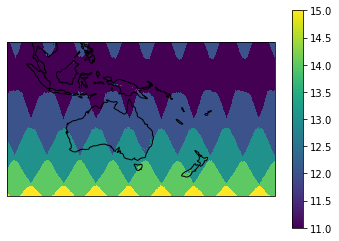

In [5]:
ax=plt.subplot(111,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(data.collapsed('time',iris.analysis.MAX)/3600)
plt.colorbar()
ax.coastlines()

In [66]:
data.units

Unit('s')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


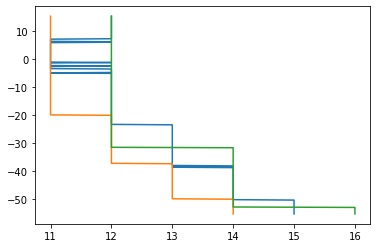

In [52]:
iplt.plot(data.collapsed(['time','longitude'],iris.analysis.MAX)/3600)
iplt.plot(data.collapsed(['time'],iris.analysis.MAX).collapsed('longitude',iris.analysis.MIN)/3600)

plt.plot((I>120).sum(axis=1).max(axis=1),lat*180/np.pi)

In [76]:
H = np.arange(-12.5,11.5,1)/12*np.pi
Y = -23.5*np.cos((np.arange(0,365)+10)/365*2*np.pi)/180*np.pi
lat = data.coord('latitude').points*np.pi/180

HH,ll,YY = np.meshgrid(H,lat,Y)
I = 1133 * (np.sin(ll) * np.sin(YY) + np.cos(ll)*np.cos(YY)*np.cos(HH))


I.shape,H*2*np.pi

((458, 24, 365),
 array([-20.56167584, -18.91674177, -17.2718077 , -15.62687364,
        -13.98193957, -12.3370055 , -10.69207143,  -9.04713737,
         -7.4022033 ,  -5.75726923,  -4.11233517,  -2.4674011 ,
         -0.82246703,   0.82246703,   2.4674011 ,   4.11233517,
          5.75726923,   7.4022033 ,   9.04713737,  10.69207143,
         12.3370055 ,  13.98193957,  15.62687364,  17.2718077 ]))

In [17]:
np.maximum(I,0).sum(axis=1).max(axis=1)

array([19625.2119098 , 19627.30408908, 19629.25355255, 19631.06028603,
       19632.72427639, 19634.24551152, 19638.72733639, 19644.11801854,
       19649.36586261, 19654.47083046, 19659.43288496, 19664.25199003,
       19668.92811062, 19673.46121275, 19677.85126344, 19682.09823078,
       19686.20208389, 19690.16279291, 19693.98032907, 19697.65466459,
       19701.18577276, 19704.5736279 , 19707.81820538, 19710.91948161,
       19713.87743404, 19716.69204115, 19719.36328249, 19721.89113863,
       19724.27559118, 19726.51662282, 19728.61421724, 19730.5683592 ,
       19732.37903448, 19734.04622992, 19735.56993339, 19736.95013383,
       19738.18682118, 19739.27998646, 19740.22962172, 19741.03572005,
       19741.6982756 , 19743.37187501, 19747.42756224, 19751.3396602 ,
       19755.10814046, 19758.73297561, 19762.21413928, 19765.55160618,
       19768.74535202, 19771.7953536 , 19774.70158872, 19777.46403627,
       19780.08267614, 19782.55748931, 19784.88845777, 19787.07556459,
      

In [109]:
a=np.unique(data.data.flatten())

In [111]:
a/3600


masked_array(data=[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25,
                   2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75,
                   5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25,
                   7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75,
                   10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75,
                   12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
       fill_value=1e+20,
          

In [119]:
I.shape

(436, 97, 821)

In [122]:
np.where(np.abs(lat)<0.001)

(array([347]),)

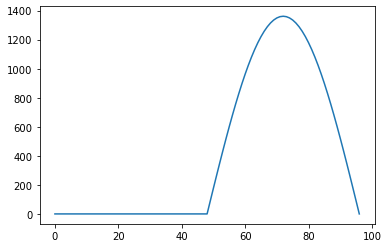

In [130]:
plt.plot(np.maximum(I[347,:,410],0))

In [132]:
H.max()

3.141592653589793

In [82]:
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/day/pr/pr_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_day_198001-198012.nc"
data1=iris.load_cube(path)
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/day/prc/prc_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_day_198001-198012.nc"
data2=iris.load_cube(path)

In [83]:
(data1.data >= data2.data).all()


True

In [84]:
ratio = data2/(data1+1e-32)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


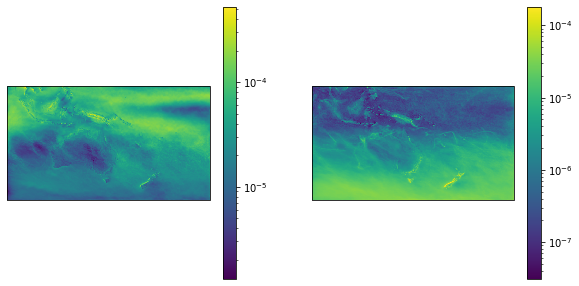

In [94]:
plt.figure(figsize=(10,5))
plt.subplot(121,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(data2.collapsed(['time'],iris.analysis.MEAN),norm=LogNorm())#,vmin=0,vmax=1)
plt.colorbar()
plt.subplot(122,projection=ccrs.PlateCarree(180))
iplt.pcolormesh((data1-data2).collapsed(['time'],iris.analysis.MEAN),norm=LogNorm())#,vmin=0,vmax=1)
plt.colorbar()
#iplt.plot(1-ratio.collapsed(['time','longitude'],iris.analysis.MEAN))

In [15]:
data1.data[data1.data>0].min()

1.5522043e-10

In [56]:
I.shape

(458, 24, 365)

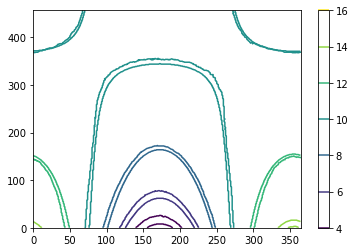

In [81]:
c=plt.contour((I>120).sum(axis=1),np.arange(4,18,2))
plt.contour(np.round(data.data.mean(axis=2).T/3600,0),np.arange(4,18,2))
plt.colorbar()


In [31]:
data

<iris 'Cube' of sundcs / (unknown) (time: 366; latitude: 458; longitude: 798)>

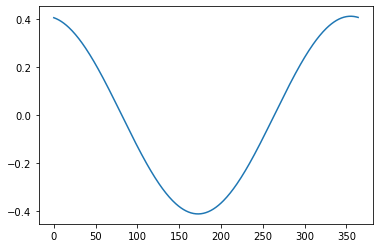

In [48]:
plt.plot(Y)

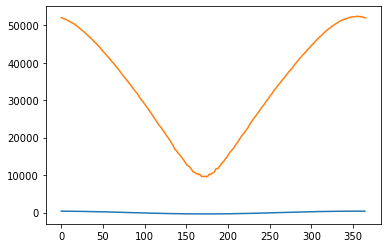

In [53]:
plt.plot(I.mean(axis=1)[0])
plt.plot(data.data.mean(axis=2).T[0])


In [65]:
I

array([[[-2.20247194e+02, -2.21640642e+02, -2.23164729e+02, ...,
         -2.16855595e+02, -2.17854229e+02, -2.18984901e+02],
        [-2.20247194e+02, -2.21640642e+02, -2.23164729e+02, ...,
         -2.16855595e+02, -2.17854229e+02, -2.18984901e+02],
        [-1.80506468e+02, -1.81878379e+02, -1.83378976e+02, ...,
         -1.77167534e+02, -1.78150625e+02, -1.79263735e+02],
        ...,
        [ 4.84040235e+00,  3.56893859e+00,  2.17789240e+00, ...,
          7.93371174e+00,  7.02311132e+00,  5.99190677e+00],
        [-1.03733281e+02, -1.05063585e+02, -1.06518805e+02, ...,
         -1.00496088e+02, -1.01449152e+02, -1.02528336e+02],
        [-1.80506468e+02, -1.81878379e+02, -1.83378976e+02, ...,
         -1.77167534e+02, -1.78150625e+02, -1.79263735e+02]],

       [[-2.23193463e+02, -2.24586122e+02, -2.26109340e+02, ...,
         -2.19803764e+02, -2.20801841e+02, -2.21931880e+02],
        [-2.23193463e+02, -2.24586122e+02, -2.26109340e+02, ...,
         -2.19803764e+02, -2.20801841e

In [40]:
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/mon/hurs/hurs_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_mon_198001-198012.nc"
data=iris.load_cube(path)


In [96]:
data1

<iris 'Cube' of relative_humidity / (%) (time: 366; latitude: 436; longitude: 777)>

In [97]:
data.data.min()

103.155396

In [48]:

ei=iris.load("/g/data/rr7/ERA_INT/ERA_INT/ERA_INT_hur_1979.nc")

In [10]:
ei[0].coord('longitude')

<DimCoord: longitude / (degrees)  [ 0. , 1.5, ..., 357. , 358.5]+bounds  shape(240,)>

In [3]:
cy = iris.Constraint(latitude=lambda x:-55<=x<=10)
cx = iris.Constraint(longitude=lambda y:90<=y<=200)

In [49]:
ei = ei[0][:,0].extract(cx&cy)


In [39]:
#ei.coord('longitude').guess_bounds()
#ei.coord('latitude').guess_bounds()
data.coord('longitude').guess_bounds()
data.coord('latitude').guess_bounds()

data=data.regrid(ei,iris.analysis.AreaWeighted())

ValueError: Coord already has bounds. Remove the bounds before guessing new ones.

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


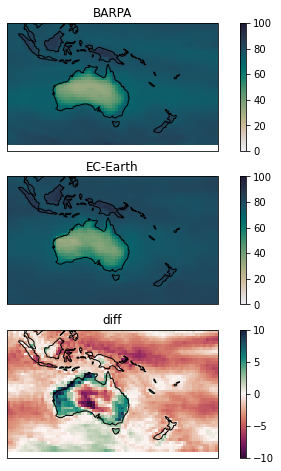

In [29]:
plt.figure(figsize=(8,8))

ax=plt.subplot(311,projection=ccrs.PlateCarree(180))
plt.title("BARPA")
iplt.pcolormesh(data.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.rain,vmin=0,vmax=100)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(312,projection=ccrs.PlateCarree(180))
plt.title("EC-Earth")
iplt.pcolormesh(ei.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.rain,vmin=0,vmax=100)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(313,projection=ccrs.PlateCarree(180))
plt.title("diff")
iplt.pcolormesh(data.collapsed('time',iris.analysis.MEAN)-ei.extract(cx&cy).collapsed('time',iris.analysis.MEAN),vmin=-10,vmax=10,cmap=cmocean.cm.curl_r)
plt.colorbar()
ax.coastlines()

In [6]:
import cmocean

In [38]:
eiq=iris.load("/g/data/rr7/ERA_INT/ERA_INT/ERA_INT_hus_1979.nc")
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/mon/huss/huss_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_mon_198001-198012.nc"
dataq=iris.load_cube(path)


In [50]:
eiq = eiq[0][:,0].extract(cx&cy)
#ei.coord('longitude').guess_bounds()
#ei.coord('latitude').guess_bounds()
dataq.coord('longitude').guess_bounds()
dataq.coord('latitude').guess_bounds()

#dataq=dataq.regrid(eiq,iris.analysis.AreaWeighted())

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/d

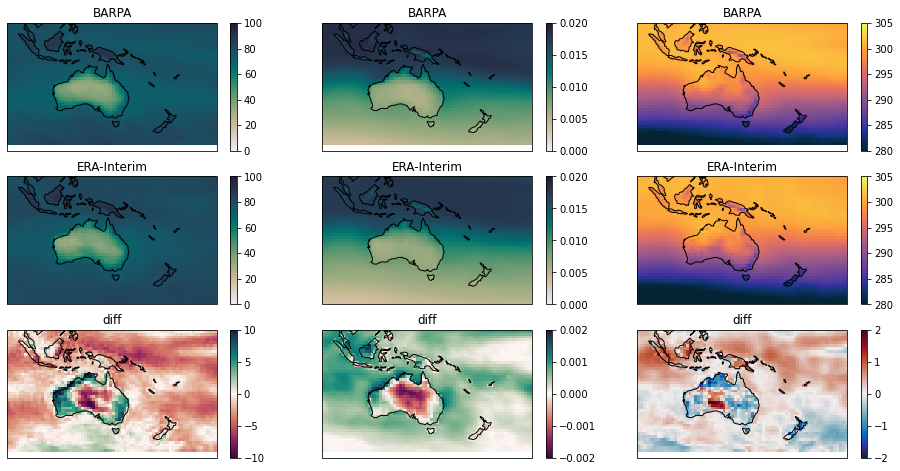

In [36]:
plt.figure(figsize=(16,8))

ax=plt.subplot(331,projection=ccrs.PlateCarree(180))
plt.title("BARPA")
iplt.pcolormesh(data.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.rain,vmin=0,vmax=100)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(334,projection=ccrs.PlateCarree(180))
plt.title("ERA-Interim")
iplt.pcolormesh(ei.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.rain,vmin=0,vmax=100)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(337,projection=ccrs.PlateCarree(180))
plt.title("diff")
iplt.pcolormesh(data.collapsed('time',iris.analysis.MEAN)-ei.extract(cx&cy).collapsed('time',iris.analysis.MEAN),vmin=-10,vmax=10,cmap=cmocean.cm.curl_r)
plt.colorbar()
ax.coastlines()

ax=plt.subplot(332,projection=ccrs.PlateCarree(180))
plt.title("BARPA")
iplt.pcolormesh(dataq.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.rain,vmin=0,vmax=0.02)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(335,projection=ccrs.PlateCarree(180))
plt.title("ERA-Interim")
iplt.pcolormesh(eiq.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.rain,vmin=0,vmax=0.02)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(338,projection=ccrs.PlateCarree(180))
plt.title("diff")
iplt.pcolormesh(dataq.collapsed('time',iris.analysis.MEAN)-eiq.extract(cx&cy).collapsed('time',iris.analysis.MEAN),vmin=-0.002,vmax=0.002,cmap=cmocean.cm.curl_r)
plt.colorbar()
ax.coastlines()



ax=plt.subplot(333,projection=ccrs.PlateCarree(180))
plt.title("BARPA")
iplt.pcolormesh(datat.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.thermal,vmin=280,vmax=305)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(336,projection=ccrs.PlateCarree(180))
plt.title("ERA-Interim")
iplt.pcolormesh(eit.extract(cx&cy).collapsed('time',iris.analysis.MEAN),cmap=cmocean.cm.thermal,vmin=280,vmax=305)
plt.colorbar()
ax.coastlines()
ax=plt.subplot(339,projection=ccrs.PlateCarree(180))
plt.title("diff")
iplt.pcolormesh(datat.collapsed('time',iris.analysis.MEAN)-eit.extract(cx&cy).collapsed('time',iris.analysis.MEAN),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
plt.colorbar()
ax.coastlines()

In [9]:
eiq

Specific Humidity (1),latitude
Shape,45
Dimension coordinates,
latitude,x
Scalar coordinates,"air_pressure 100000.0 Palongitude 90.0 degrees, bound=(89.25, 90.75) degrees"
time 1979-01-01 00,0:00
Attributes,
CDI 'Climate Data Interface version 1.5.2 (http,/code.zmaw.de/projects/cd...
CDO 'Climate Data Operators version 1.5.2 (http,/code.zmaw.de/projects/cd...Conventions 'CF-1.0'comment ''convention 'COARDS'expt_id '0001'
history 'Thu Jun 21 15,"2:38 2012: cdo setday,1 ERA_INT/ERA_INT/ERA_INT_hus_1979.nc...name 'hus'"
production 'Created Thu Sep 22 01,9:16 2011 by Ben Hu'


In [20]:
100* 0.002/0.02

10.0

In [37]:
eit=iris.load("/g/data/rr7/ERA_INT/ERA_INT/ERA_INT_tas_1979.nc")
path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/mon/tasmean/tasmean_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_mon_198001-198012.nc"
datat=iris.load_cube(path)
eit = eit[0][:].extract(cx&cy)
#ei.coord('longitude').guess_bounds()
#ei.coord('latitude').guess_bounds()
datat.coord('longitude').guess_bounds()
datat.coord('latitude').guess_bounds()

#datat=datat.regrid(eit,iris.analysis.AreaWeighted())

In [32]:
eit.data.max()

309.8648

In [41]:
iris.cube.CubeList([data,dataq,datat])

[<iris 'Cube' of relative_humidity / (%) (time: 12; latitude: 436; longitude: 777)>,
<iris 'Cube' of specific_humidity / (1) (time: 12; latitude: 436; longitude: 777)>,
<iris 'Cube' of air_temperature / (K) (time: 12; latitude: 436; longitude: 777)>]

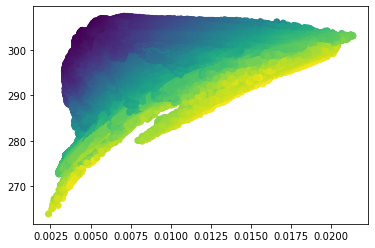

In [42]:
plt.scatter(dataq.data.flatten(),datat.data.flatten(),c=data.data.flatten())

In [52]:
iris.cube.CubeList([ei,eit,eiq])

[<iris 'Cube' of relative_humidity / (%) (time: 12; latitude: 45; longitude: 74)>,
<iris 'Cube' of air_temperature / (K) (time: 12; latitude: 45; longitude: 74)>,
<iris 'Cube' of specific_humidity / (1) (time: 12; latitude: 45; longitude: 74)>]

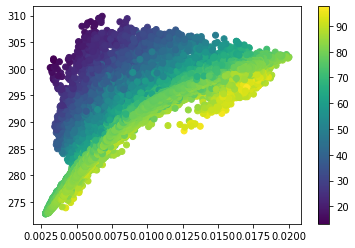

In [53]:
plt.scatter(eiq.data.flatten(),eit.data.flatten(),c=ei.data.flatten())
plt.colorbar()